In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [353]:
from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data
y = iris.target
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [354]:
def model_fit_and_predict(train_x, train_y, test_x, test_y):
    mlp = MLPClassifier(hidden_layer_sizes=(10,8,5),max_iter=1000)
    start = time.time()
    mlp.fit(train_x,train_y)
    stop = time.time()
    print(f"Training time: {stop - start}s")
    predict = mlp.predict(test_x)
    print("Accuracy: ", accuracy_score(predict, test_y))
    print("Confusion Matrix")
    conf_mat = confusion_matrix(predict,test_y)
    print(conf_mat)
    print("Performance Evaluation")
    print(classification_report(predict,test_y))

In [355]:
def kmeans_cluster(X, y, plot):
    Kmean = KMeans(n_clusters=3)
    Kmean.fit(X)
    centers = Kmean.cluster_centers_
    plot.figure(figsize=(8,6))
    fig, ax = plot.subplots()
    scatter = ax.scatter(X[:,0],X[:,1],s=50,c=y)
    ax.scatter(centers[:,0],centers[:,1], s=200,marker='s',c='r')
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
    ax.add_artist(legend1)
    plot.xlabel('First principle component')
    plot.ylabel('Second principle component')
    

In [356]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.35)

In [357]:
model_fit_and_predict(xtrain,ytrain,xtest,ytest)

Training time: 0.4759352207183838s
Accuracy:  0.9433962264150944
Confusion Matrix
[[20  0  0]
 [ 0 19  0]
 [ 0  3 11]]
Performance Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.86      1.00      0.93        19
           2       1.00      0.79      0.88        14

    accuracy                           0.94        53
   macro avg       0.95      0.93      0.94        53
weighted avg       0.95      0.94      0.94        53



<Figure size 576x432 with 0 Axes>

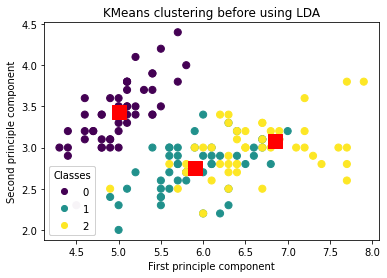

In [358]:
kmeans_cluster(X,y,plt)
plt.title("KMeans clustering before using LDA")
plt.show()

In [359]:
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

In [360]:
LDA_object = LDA(n_components=2)
LDA_object.fit(X, y)
X_modified = LDA_object.transform(X)


In [361]:
xtrain,xtest,ytrain,ytest = train_test_split(X_modified,y,test_size=0.35)

In [362]:
model_fit_and_predict(xtrain,ytrain,xtest,ytest)

Training time: 0.4393279552459717s
Accuracy:  0.9811320754716981
Confusion Matrix
[[17  0  0]
 [ 0 18  0]
 [ 0  1 17]]
Performance Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        18

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



<Figure size 576x432 with 0 Axes>

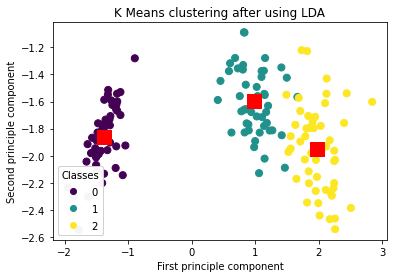

In [363]:
kmeans_cluster(X_modified,y,plt)
plt.title("K Means clustering after using LDA")
plt.show()